# Bike Buyer Analysis

## Aim
To determine the type of Customers that will buy a motorcycle

### Objectives of Analysis
- Use two methods of modelling and compare them.
- Determine the significant features that affect a buyer's decision.
- Give Marketing recomendations based on results.


### Requirements
- 48 hours to do
- 6 slides of content no more, no less.
- Submit on Github
- Non-technical audience.

### Outline of Report
The report starts with Data preprocessing to understand what kind of sample we have. Then a preliminary feature selection is carried out before moving on to analysis. Lastly, the results are interpreted.

In [1]:
# Import libraries and for Display settings

import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

# Data Preprocessing
In this step the data is cleaned and processed before analysis.

In [2]:
# What does the data look like?
raw = pd.read_csv('Bike_Buyer_Data_edited.csv')
print(raw.shape)
raw.head(20)

(1000, 14)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Unnamed: 13
0,22400,Married,Male,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes,NaN
1,16438,Married,Female,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,30,No,NaN
2,16200,Single,Female,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,35,No,NaN
3,16514,Single,Male,10000,0,Partial College,Manual,Yes,1,1-2 Miles,Pacific,26,Yes,NaN
4,24140,Single,Male,10000,0,Graduate Degree,Manual,No,0,0-1 Miles,Europe,30,Yes,NaN
5,23993,Single,Female,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes,NaN
6,22402,Married,Male,10000,0,Partial College,Manual,Yes,1,2-5 Miles,Pacific,25,Yes,NaN
7,15465,Married,Female,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,25,No,NaN
8,23963,NaN,Married,Male,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,33,No
9,17907,Married,Female,10000,0,Partial College,Manual,Yes,1,2-5 Miles,Pacific,27,No,NaN


There are 1000 data points and 14 columns in the raw unprocessed data. The data is not perfect and needs to be cleaned, i.e. row 8 commute distance.

In [3]:
# Check NaN
raw.isnull().sum()

ID                    0
Marital Status        1
Gender                1
Income                0
Children              0
Education             1
Occupation            0
Home Owner            0
Cars                  0
Commute Distance      0
Region                1
Age                   0
Purchased Bike        0
Unnamed: 13         999
dtype: int64

The entire last column is NaN, and some rows have NaN values. These are removed below.

In [4]:
#Remove unnamed column and remove reamining NaN rows.

data = raw.drop(axis=1,labels='Unnamed: 13') # drop column. Do this first to avoid dropping every row.
data = data.dropna(axis=0) #drop rows containing NaN
data.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

It is a good idea to check dtypes to find errors,and understand if we have categorical or numerical features.

In [5]:
#Check dtypes.
data.dtypes

ID                   int64
Marital Status      object
Gender              object
Income              object
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                object
Commute Distance    object
Region              object
Age                 object
Purchased Bike      object
dtype: object

Comments:
1. Income, Cars, Commute Distance, Age are intended to be Numeric. They are not numeric, this implies that there are hidden errors in the data. The errors must be converted to NaN, then removed.
2. There are both categorical and Numerical Features. These will have to be converted to use in the algorithm

In [6]:
for column in data:
    unique_vals = data[column].unique()
    num_unique = len(unique_vals) 
    if num_unique>100:
        print(f'For Column {column}, Number of Unique values are {num_unique}')
    else:
        print(f'For Column {column}, Number of Unique values are {num_unique}, values are {unique_vals}')

For Column ID, Number of Unique values are 996
For Column Marital Status, Number of Unique values are 2, values are ['Married' 'Single']
For Column Gender, Number of Unique values are 2, values are ['Male' 'Female']
For Column Income, Number of Unique values are 17, values are ['10000' '20000' '30000' '40000' '50000' '60000' '70000' '80000' '90000'
 '100000' '110000' '120000' '130000' '150000' '160000' '250000' '170000']
For Column Children, Number of Unique values are 7, values are [ 0  1  2  3  4  5 12]
For Column Education, Number of Unique values are 5, values are ['Partial College' 'Partial High School' 'Graduate Degree' 'High School'
 'Bachelors']
For Column Occupation, Number of Unique values are 5, values are ['Manual' 'Clerical' 'Skilled Manual' 'Professional' 'Management']
For Column Home Owner, Number of Unique values are 2, values are ['No' 'Yes']
For Column Cars, Number of Unique values are 6, values are ['1' '2' '0' '-1' '3' '4']
For Column Commute Distance, Number of Uni

Comments:
1. There are no repeats of IDs
2. For Cars, -1 values must be removed.
3. Commute Distance - change format

The format of Commute Distance is changed.

In [7]:
# Commute Distance
f = data['Commute Distance'].unique()
print(f'Commute distance is categorised into:{f}')
data['Commute Distance']=data['Commute Distance'].apply(lambda x: (  x[0:2].split('-')[0]) )
g = data['Commute Distance'].unique()
print(f'Commute distance categories have changed to:{g}')

Commute distance is categorised into:['0-1 Miles' '1-2 Miles' '2-5 Miles' '5-10 Miles' '10+ Miles']
Commute distance categories have changed to:['0' '1' '2' '5' '10']


In [8]:
#pandas will try to convert select columns to numeric. When it cant do so for some elements, it will replace the element with NaN.
data[['Income', 'Cars', 'Commute Distance', 'Age']]=data[['Income', 'Cars', 'Commute Distance', 'Age']].apply(pd.to_numeric,errors='coerce')
data = data[data.Cars != -1]
data.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance     int64
Region              object
Age                  int64
Purchased Bike      object
dtype: object

The data is now clean. The next step is to investigate the relationship between the numeric data, to understand their behaviour.

<AxesSubplot:xlabel='Commute Distance', ylabel='Density'>

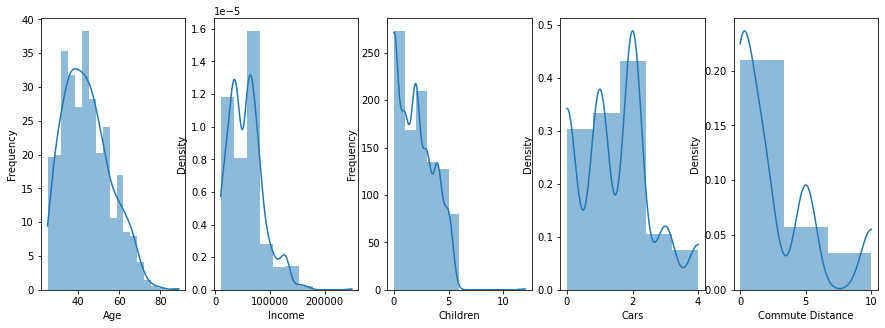

In [9]:
#Histograms of Numerical Plots
fig, axs = plt.subplots(ncols=5)


sns.histplot(data.Age, kde=True, stat="frequency", linewidth=0, ax=axs[0])
sns.histplot(data.Income, kde=True, bins =10, stat="density", linewidth=0, ax=axs[1])
sns.histplot(data.Children, kde=True,bins=12, stat="frequency", linewidth=0, ax=axs[2])
sns.histplot(data.Cars, bins=5, kde=True, stat="density", linewidth=0, ax=axs[3])
sns.histplot(data['Commute Distance'], kde=True,bins=3, stat="density", linewidth=0, ax=axs[4])


There are a few outliers in Age, Income and Children. 
It is true that our Dataset is small (1000 points only), but they may contradict model assumptions in regression.

In [10]:
data = data[data.Age<85]
data = data[data.Income<200000]
data = data[data.Children<6]

### Data Exploration
The Numerical Values (excluding ID) are plotted against each other to find patterns. This gives an idea of the important features for modelling.

- Note: the diagonal values are represented as histograms. The y axis is frequency, and x axis are bins. The plots off the axis are siply the axis plotted against each other. For example, Income against Age in the top right corner.

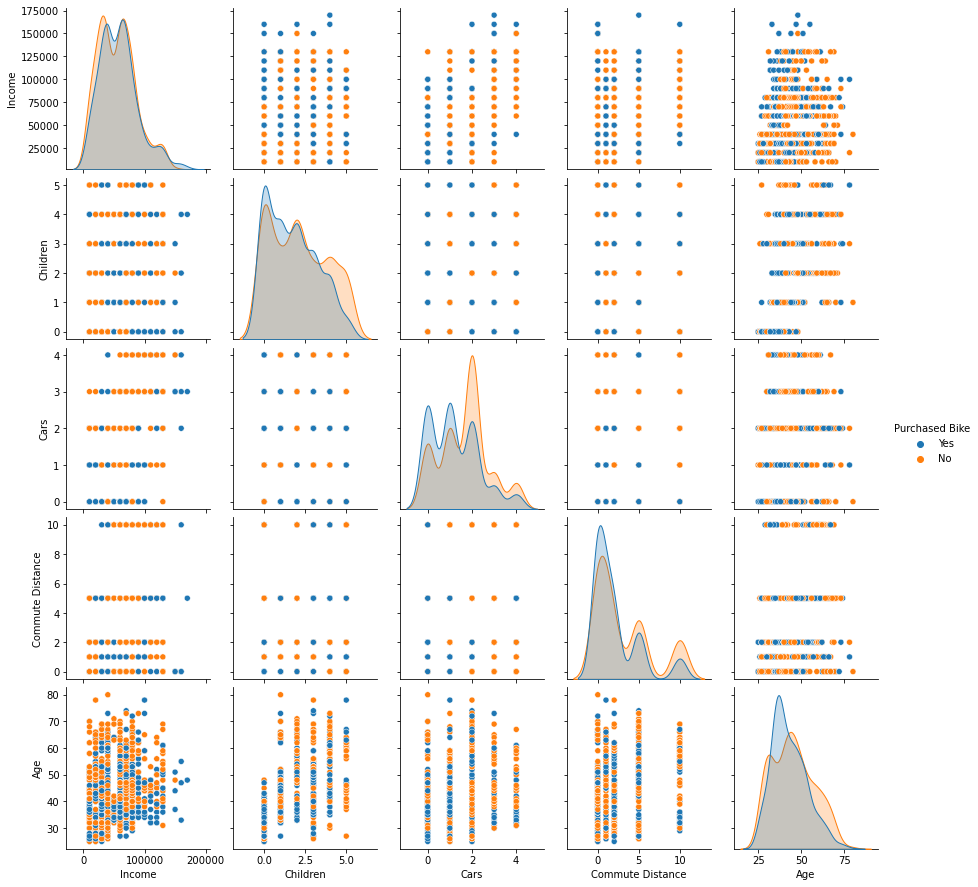

In [11]:
g= sns.pairplot(data.iloc[:,1:],hue='Purchased Bike') 

blablabla

<AxesSubplot:xlabel='Purchased Bike', ylabel='count'>

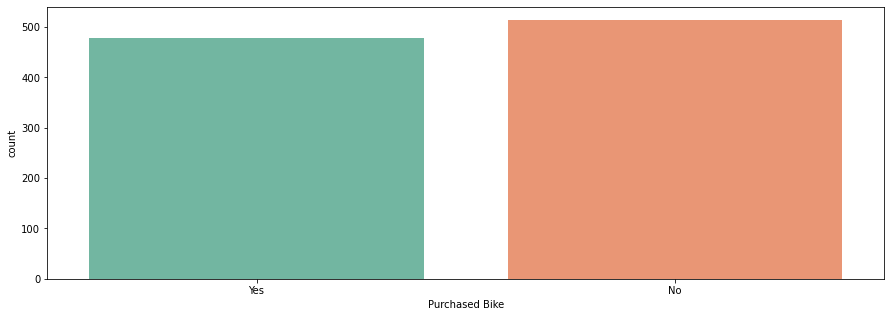

In [12]:
# Distribution of Y(label) 'Dependent Variable'
sns.countplot(x=data['Purchased Bike'], palette ='Set2')

In [13]:
data.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

The labels are balanced since number of Yes's and No's are similar.

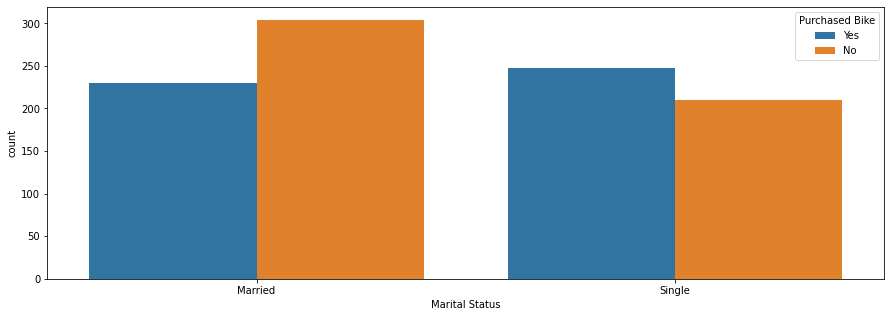

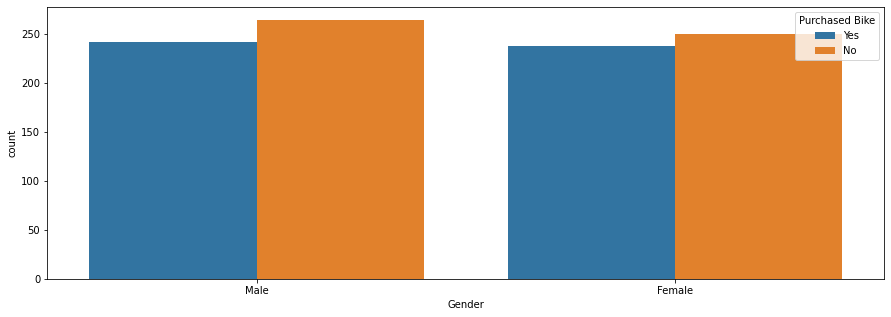

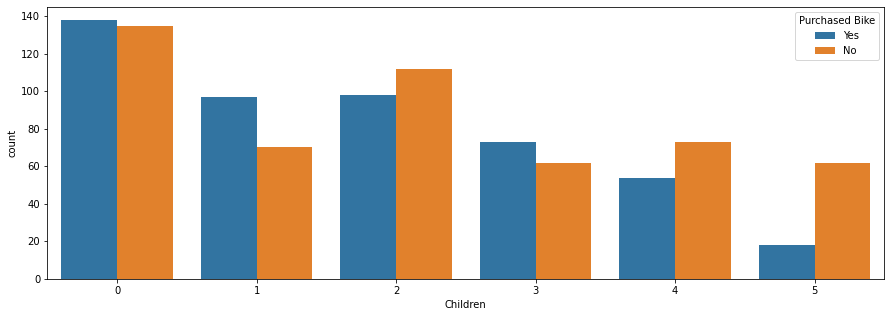

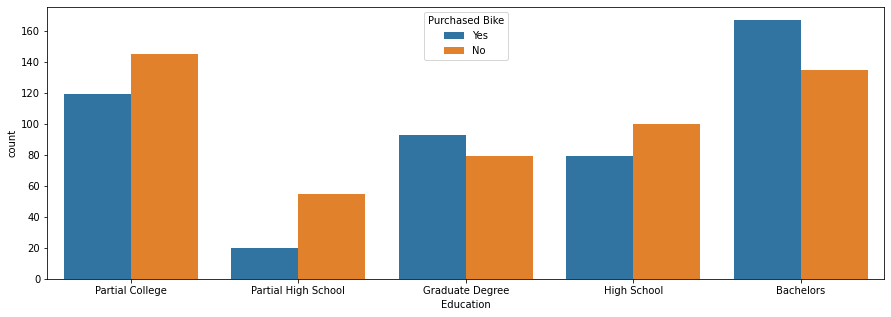

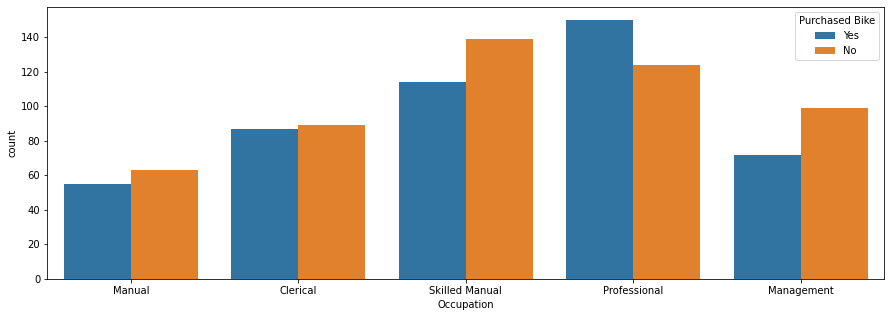

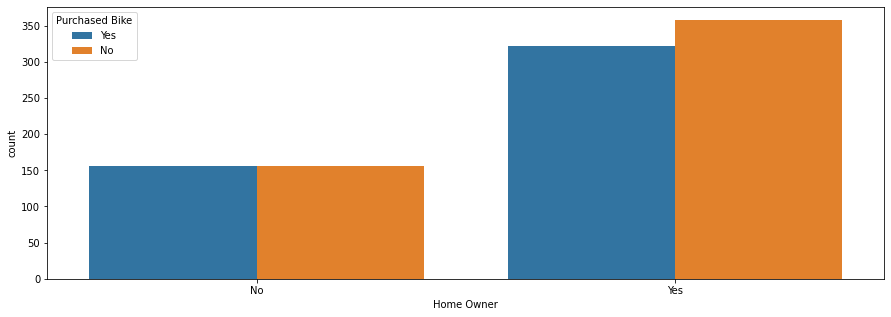

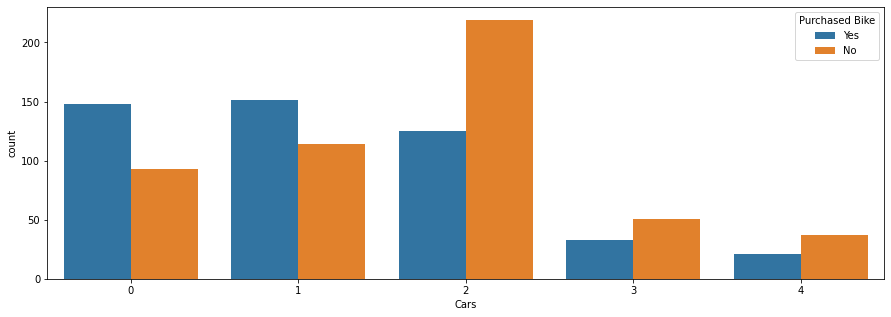

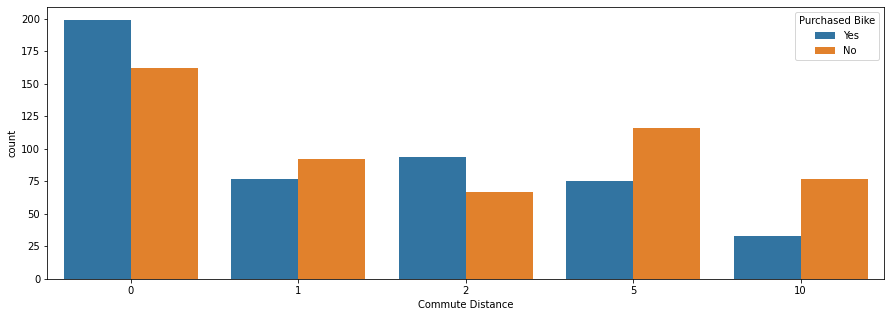

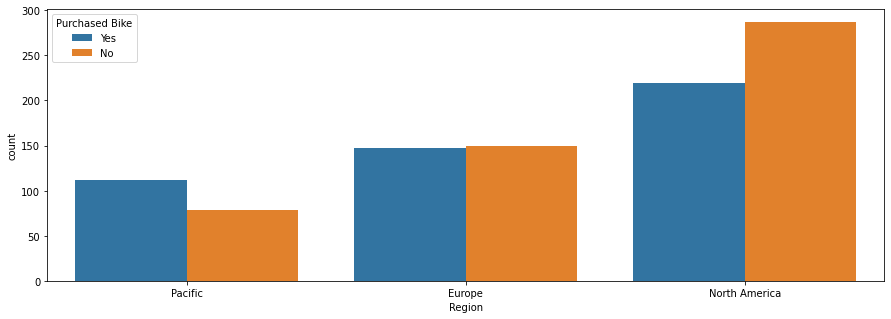

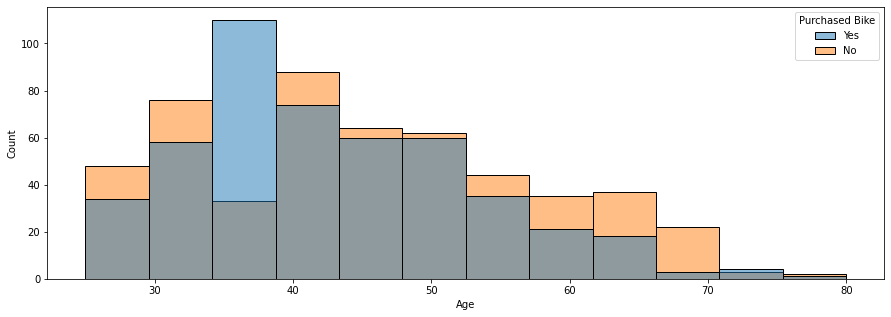

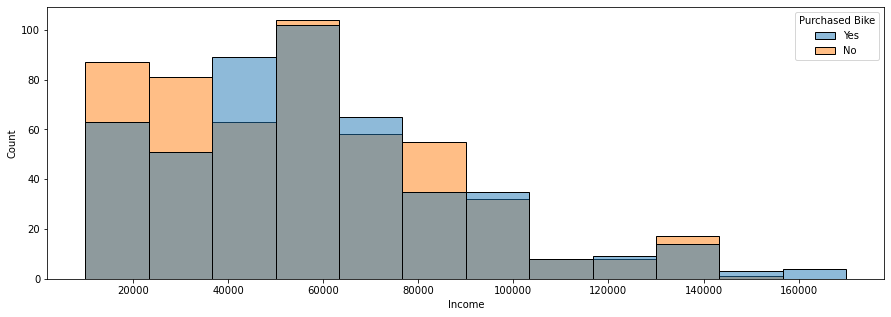

In [14]:
# Checking if features have a relationship with the Features.
features1 = ['Marital Status', 'Gender', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region']
features2 = ['Age','Income']

for feature in features1:
    sns.countplot(x=feature, data=data, hue='Purchased Bike')
    plt.show()
    

for feature in features2:
    sns.histplot(x=feature, data=data, hue='Purchased Bike', bins=12)
    plt.show()   


In [15]:
#Interpretation

### Convert Categorical values to numerical

In [16]:
categ_features = ['Purchased Bike','Marital Status', 'Gender', 'Education',
       'Occupation', 'Home Owner', 'Region']
data2 = pd.get_dummies(data, columns = categ_features)

In [17]:
data2.head(1)

,ID,Income,Children,Cars,Commute Distance,Age,Purchased Bike_No,Purchased Bike_Yes,Marital Status_Married,Marital Status_Single,...,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_No,Home Owner_Yes,Region_Europe,Region_North America,Region_Pacific
0,22400,10000,0,1,0,26,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1


In [18]:
data2 = data2.drop(['Marital Status_Single','Gender_Female','Purchased Bike_No'], axis=1)

In [19]:
data2.dtypes.unique()
# Hence, all our data is numerical and readdy for modelling

array([dtype('int64'), dtype('uint8')], dtype=object)

## Feature Selection
Ready made libvraries are sued to select most significant features i.e. columns from the data.

In [20]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [21]:
# Split into X and Y
y = data2['Purchased Bike_Yes']
x = data2.drop(['ID','Purchased Bike_Yes'],axis=1)
# Run Random Forest (very low computation)
clf = DecisionTreeClassifier(max_depth=10, criterion='gini').fit(x,y) #Set settings

In [22]:
# Estimate Importance
col = []
imp = []

for i,column in enumerate(x):
    print(f'Column {column} has feature importance score of : {clf.feature_importances_[i]}')
    col.append(column)
    imp.append(clf.feature_importances_[i])

Column Income has feature importance score of : 0.11542436451660365
Column Children has feature importance score of : 0.05378557655314663
Column Cars has feature importance score of : 0.11927151961312664
Column Commute Distance has feature importance score of : 0.1107048877911248
Column Age has feature importance score of : 0.28632809673196963
Column Marital Status_Married has feature importance score of : 0.038568180345728766
Column Gender_Male has feature importance score of : 0.03753720559123264
Column Education_Bachelors has feature importance score of : 0.02259813450919354
Column Education_Graduate Degree has feature importance score of : 0.003558235889162295
Column Education_High School has feature importance score of : 0.006682445202833376
Column Education_Partial College has feature importance score of : 0.012569564784942472
Column Education_Partial High School has feature importance score of : 0.006782244388582527
Column Occupation_Clerical has feature importance score of : 0.

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

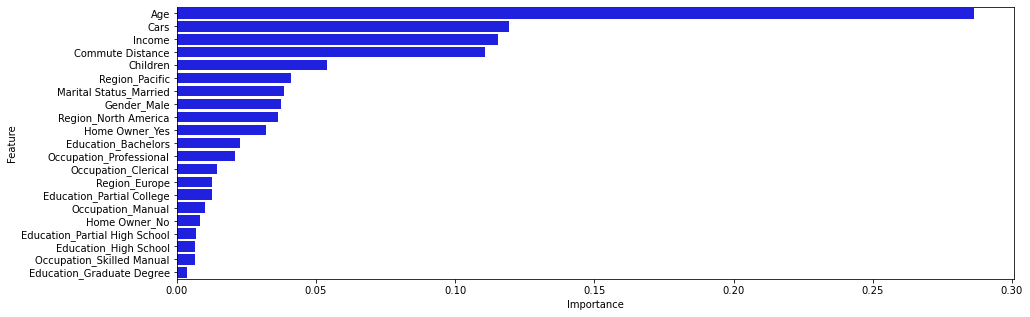

In [23]:
#Remove Importance of zero. Occupation Management
df1 = pd.DataFrame(dict(Feature = col, Importance=imp))
df1 = df1[df1.Feature !='Occupation_Management'].sort_values('Importance', ascending=False)
sns.barplot(x="Importance", y="Feature", data=df1, label="Total", color="b")

Note:
- We have not standardised our Data, which is not important for Logistic Regression.

## Model Training
All the features above will be used for logistic regression. This is feasible computationally.

In [24]:
# Make x and y
Columns_needed = df1.Feature.values
x = data2[Columns_needed].values
y = data2['Purchased Bike_Yes']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2)


In [25]:
# Train Model
clf = LogisticRegression(solver = 'lbfgs').fit(x_train,y_train)

In [26]:
training_accuracy = clf.score(x_train , y_train)
testing_accuracy = clf.score(x_test , y_test)
print (f'The score for the training data is {str(training_accuracy*100)[:5]}%. The score for the test data is {str(testing_accuracy*100)[:5]}%')

The score for the training data is 54.09%. The score for the test data is 50.25%


In [27]:
# Perform Cross validation
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(solver = 'lbfgs') 
grid_params = {"C": np.logspace(-4, 3, num=10)} #num is number of iterations
n_folds=5
gs = GridSearchCV(clf, param_grid=grid_params, cv=n_folds, return_train_score=True) #gridsearch automatically loops through hyperparameters and scores them.
gs.fit(x, y)
best_parameter, best_score = gs.best_params_, gs.best_score_
print(best_parameter)

{'C': 0.021544346900318846}


In [40]:
train_score = pd.DataFrame(gs.cv_results_).sort_values('mean_test_score',ascending=False)['mean_train_score'].values[0]
train_score

0.5841554407107531

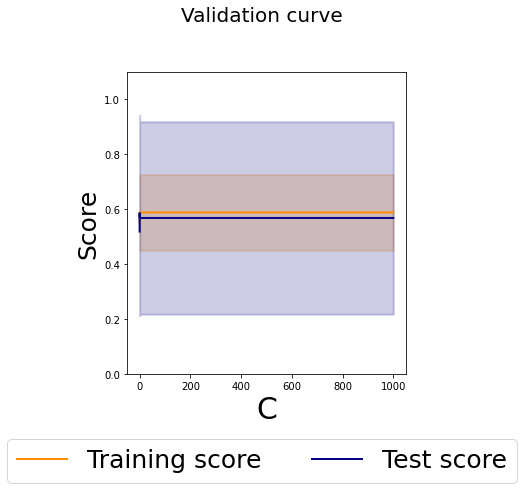

In [28]:
df = pd.DataFrame(gs.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

fig, axes = plt.subplots(1, len(grid_params), 
                         figsize = (5*len(grid_params), 7),
                         sharey='row')
axes.set_ylabel("Score", fontsize=25)


for idx, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results].agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes.set_xlabel(param_name, fontsize=30)
    axes.set_ylim(0.0, 1.1)
    lw = 2
    axes.plot(param_range, grouped_df['mean_train_score'], label="Training score",
                color="darkorange", lw=lw)
    axes.fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                    grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                    color="darkorange", lw=lw)
    axes.plot(param_range, grouped_df['mean_test_score'], label="Test score",
                color="navy", lw=lw)
    axes.fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes.get_legend_handles_labels()
fig.suptitle('Validation curve', fontsize=20)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=25)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

In [29]:
print(best_score)

0.5868839145221055


In [41]:
print (f'The score for the training data is {str(train_score*100)[:5]}%. The score for the test data is {str(best_score*100)[:5]}%')

The score for the training data is 58.41%. The score for the test data is 58.68%


### Conclusion
The logistic regression model performed poorly on both the training and testing dataset. In other words, the model could not find a 'strong' linear relationship between the label and the features. A  model that behaves like this is said to be [underfit](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/#:~:text=Underfitting%20refers%20to%20a%20model,performance%20on%20the%20training%20data.).

One drawback of linear and Logistic Regression models is that they can't predict non-linear problems accurately. Decision Tree will be used next.

### Decision Tree Model

In [45]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train,y_train)
t_train_score, t_test_score = clf.score(x_train,y_train),clf.score(x_test,y_test)
print (f'The training accuracy is {str(t_train_score*100)[:5]}%. The testing accuracy is {str(t_test_score*100)[:5]}%')

The training accuracy is 99.36%. The testing accuracy is 63.31%


This time, our model is overfit. Do Cross_validation

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1080 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (

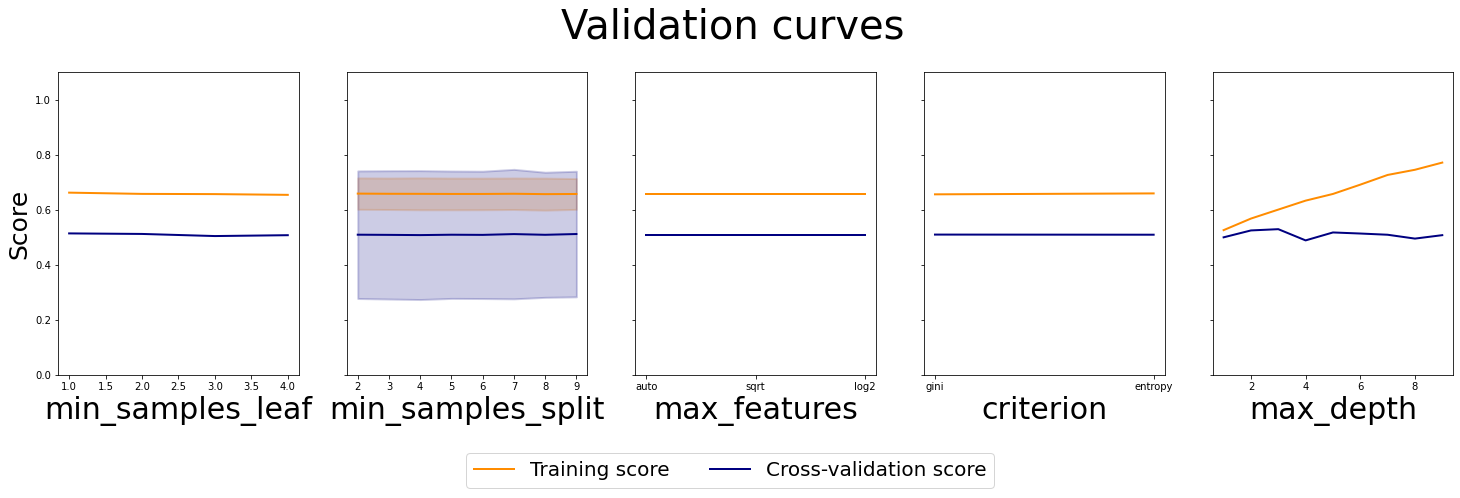

In [54]:
from sklearn.model_selection import GridSearchCV, train_test_split

grid_params = {
   'min_samples_leaf': range(1,5),
   'min_samples_split':range(1,10),
   'max_features': ['auto', 'sqrt', 'log2'],
   'criterion': ['gini', 'entropy'],
   'max_depth': range(1,10)
}

gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid = grid_params,
    cv=5,
    verbose=1,
    n_jobs=-1, 
    return_train_score=True # set this for train score
)

gs.fit(x, y)

df = pd.DataFrame(gs.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

fig, axes = plt.subplots(1, len(grid_params), 
                         figsize = (5*len(grid_params), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)


for idx, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    lw = 2
    axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
                color="darkorange", lw=lw)
    axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                    grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                    color="darkorange", lw=lw)
    axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

In [55]:
best_parameter, best_score = gs.best_params_, gs.best_score_
train_score = pd.DataFrame(gs.cv_results_).sort_values('mean_test_score',ascending=False)['mean_train_score'].values[0]

print (f'The score for the training data is {str(train_score*100)[:5]}%. The score for the test data is {str(best_score*100)[:5]}%')

The score for the training data is 79.76%. The score for the test data is 56.44%
